In [2]:
import sqlite3
import pandas as pd
pd.options.mode.chained_assignment = None

import sys
sys.path.append('../')

from functions.env import  DB_SCIENCE_PATH_NEW

conn = sqlite3.connect(DB_SCIENCE_PATH_NEW)

In [3]:
df_partition_global = pd.read_sql("SELECT * FROM partition_global", conn)
df_partition_global = df_partition_global.sort_values('community', ascending=False).reset_index(drop=True)

df_optimal_partition_weighted =  pd.read_sql("SELECT * FROM optimal_partition_100_europe ", conn)
df_optimal_partition_weighted = df_optimal_partition_weighted.sort_values('community', ascending=False).reset_index(drop=True)

df_partition_europe = pd.read_sql("SELECT * FROM partition_europe", conn)
df_partition_europe = df_partition_europe.sort_values('community', ascending=False).reset_index(drop=True)

df_partition_non_europe = pd.read_sql("SELECT * FROM partition_non_europe", conn)
df_partition_non_europe = df_partition_non_europe.sort_values('community', ascending=False).reset_index(drop=True)

df_partition_before_1500 = pd.read_sql("SELECT * FROM partition_global_before_1500", conn)
df_partition_before_1500 = df_partition_before_1500.sort_values('community', ascending=False).reset_index(drop=True)

df_partition_after_1500 = pd.read_sql("SELECT * FROM partition_global_after_1500", conn)
df_partition_after_1500 = df_partition_after_1500.sort_values('community', ascending=False).reset_index(drop=True)

df_optimal_antiquity =  pd.read_sql("SELECT * FROM partition_antiquity ", conn)
df_optimal_antiquity = df_optimal_antiquity.sort_values('community', ascending=False).reset_index(drop=True)

df_partition_europe_before_1700 = pd.read_sql("SELECT * FROM partition_europe_before_1700", conn)
df_partition_europe_before_1700 = df_partition_europe_before_1700.sort_values('community', ascending=False).reset_index(drop=True)

df_partition_non_europe_before_1700 = pd.read_sql("SELECT * FROM partition_non_europe_before_1700", conn)
df_partition_non_europe_before_1700 = df_partition_non_europe_before_1700.sort_values('community', ascending=False).reset_index(drop=True)


In [4]:
from sklearn.metrics import adjusted_rand_score

datasets = {
    'Weighted': df_optimal_partition_weighted,
    'Global': df_partition_global,
    'Europe': df_partition_europe,
    'Non-Europe': df_partition_non_europe,
    'Before 1500': df_partition_before_1500,
    'After 1500': df_partition_after_1500,
    'Europe before 1700': df_partition_europe_before_1700,
    'Non Europe before 1700': df_partition_non_europe_before_1700,
    #'Antiquity':df_optimal_antiquity
   
}

In [7]:
# Create an empty DataFrame to store the ARI values
ari_df = pd.DataFrame(columns=['Dataset 1', 'Dataset 2', 'ARI'])
ari_df

,Dataset 1,Dataset 2,ARI


In [8]:
dataset1 = df_partition_europe.copy()
dataset2 = df_partition_non_europe.copy()

common_elements = set(dataset1['node']).intersection(dataset2['node'])

filtered_dataset1 = dataset1[dataset1['node'].isin(common_elements)]
filtered_dataset1 = filtered_dataset1.sort_values('node', ascending=True)

filtered_dataset2 = dataset2[dataset2['node'].isin(common_elements)]
filtered_dataset2 = filtered_dataset2.sort_values('node', ascending=True)

ari = adjusted_rand_score(list(filtered_dataset1['community']), list(filtered_dataset2['community']))
ari

0.3752998529753153

In [9]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


# Iterate over pairs of datasets and compute the ARI
for dataset1_name, dataset1 in datasets.items():
    for dataset2_name, dataset2 in datasets.items():
        if dataset1_name != dataset2_name:
            # Get the common elements based on the 'node' column
            common_elements = set(dataset1['node']).intersection(dataset2['node'])

            filtered_dataset1 = dataset1[dataset1['node'].isin(common_elements)]
            filtered_dataset1 = filtered_dataset1.sort_values('node', ascending=True)

            filtered_dataset2 = dataset2[dataset2['node'].isin(common_elements)]
            filtered_dataset2 = filtered_dataset2.sort_values('node', ascending=True)
            
        
            ari = adjusted_rand_score(filtered_dataset1['community'], filtered_dataset2['community'])
            ari_df = ari_df.append({'Dataset 1': dataset1_name, 'Dataset 2': dataset2_name, 'ARI': ari}, ignore_index=True)

# Print or analyze the ARI values as needed

matrix_df = ari_df.pivot_table(index='Dataset 1', columns='Dataset 2', values='ARI', aggfunc='mean')
matrix_df = matrix_df.fillna(1)
matrix_df.to_clipboard()
matrix_df

Dataset 2,After 1500,Before 1500,Europe,Europe before 1700,Global,Non Europe before 1700,Non-Europe,Weighted
Dataset 1,,,,,,,,
After 1500,1.000000,0.054158,0.895031,0.577917,0.789567,0.135304,0.353064,0.318033
Before 1500,0.054158,1.000000,0.116140,0.317517,0.116140,0.345239,0.195734,0.419558
Europe,0.895031,0.116140,1.000000,0.672306,0.895031,0.130440,0.375300,0.321385
Europe before 1700,0.577917,0.317517,0.672306,1.000000,0.672306,0.280340,0.403511,0.366727
Global,0.789567,0.116140,0.895031,0.672306,1.000000,0.130440,0.375300,0.321385
Non Europe before 1700,0.135304,0.345239,0.130440,0.280340,0.130440,1.000000,0.247056,0.581000
Non-Europe,0.353064,0.195734,0.375300,0.403511,0.375300,0.247056,1.000000,0.334412
Weighted,0.318033,0.419558,0.321385,0.366727,0.321385,0.581000,0.334412,1.000000


In [20]:
#DeltaCon and Cut Distance

#alignment-based, graphlet-based, and spectral methods, and the recently proposed Portrait Divergence and NetLSD

In [21]:
#https://www.nature.com/articles/s41598-019-53708-y
#https://github.com/peterewills/NetComp/blob/master/netcomp/distance/exact.py

In [22]:
import networkx as nx
import netcomp as nc

G1,G2 = [nx.erdos_renyi_graph(10,1/2) for _ in range(2)] # 2 random graphs

3.3188271968344023

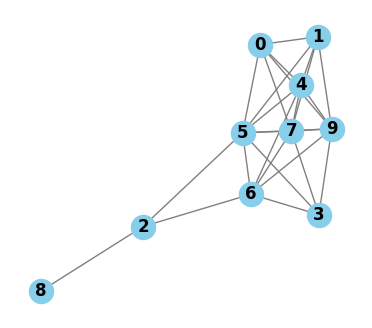

In [23]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 4))

# Plot G1
plt.subplot(1, 2, 1)
nx.draw(G1, with_labels=True, font_weight='bold', node_color='skyblue', edge_color='gray')

A1,A2 = [nx.adjacency_matrix(G) for G in [G1,G2]]

from scipy.sparse import csr_matrix

nc.lambda_dist(A1,A2,kind='laplacian',k=10)


In [24]:
import glob

for name in glob.glob('../networks/matrix/*'):
    
    matrix = pd.read_csv(name)
    matrix = matrix[['source', 'target', 'weight']]
    matrix = matrix[matrix['weight']>1]
    matrix = matrix.pivot(index='source', columns='target', values='weight')
    matrix = matrix.fillna(0)
    new_path = name.split('../networks/matrix/')[1]
    matrix.to_csv('../networks/matrix_clean/'+new_path)


In [25]:
from scipy.sparse import csr_matrix
import numpy as np

In [26]:


matrix_europe = matrix_europe.to_numpy
#matrix_europe = csr_matrix(matrix_europe)

matrix_global_after_1500 = pd.read_csv('../networks/matrix_clean/global_after_1500.csv', index_col = [0])
matrix_global_after_1500 = csr_matrix(matrix_global_after_1500)

matrix_global_before_1500 = pd.read_csv('../networks/matrix_clean/global_before_1500.csv', index_col = [0])
matrix_global_before_1500 = csr_matrix(matrix_global_before_1500)

matrix_non_europe = pd.read_csv('../networks/matrix_clean/non_europe.csv', index_col = [0])
matrix_non_europe = csr_matrix(matrix_non_europe)


NameError: name 'matrix_europe' is not defined

In [ ]:
matrix_europe = pd.read_csv('../networks/matrix_clean/europe.csv', index_col = [0])
node_lables = list(matrix_europe.index)

In [ ]:
matrix_europe= nx.from_pandas_adjacency(matrix_europe)

G = nx.relabel_nodes(G, node_labels)

matrix_europe = nx.adjacency_matrix(matrix_europe)
#nx.draw(matrix_europe, with_labels=True, font_weight='bold', node_color='skyblue', edge_color='gray')

In [ ]:
print(matrix_europe)

  (0, 1)	21.0
  (0, 2)	10.0
  (0, 4)	11.0
  (0, 5)	45.0
  (0, 6)	24.0
  (0, 10)	8.0
  (0, 11)	19.0
  (0, 12)	18.0
  (0, 13)	5.0
  (0, 15)	15.0
  (0, 17)	2.0
  (0, 18)	8.0
  (0, 19)	4.0
  (0, 20)	23.0
  (0, 21)	21.0
  (0, 25)	6.0
  (0, 26)	58.0
  (1, 0)	21.0
  (1, 2)	128.0
  (1, 4)	3.0
  (1, 5)	33.0
  (1, 8)	2.0
  (1, 10)	25.0
  (1, 11)	19.0
  (1, 12)	130.0
  :	:
  (25, 20)	42.0
  (25, 21)	21.0
  (25, 26)	15.0
  (26, 0)	58.0
  (26, 1)	43.0
  (26, 2)	27.0
  (26, 4)	11.0
  (26, 5)	302.0
  (26, 6)	31.0
  (26, 7)	2.0
  (26, 8)	5.0
  (26, 9)	2.0
  (26, 10)	24.0
  (26, 11)	78.0
  (26, 12)	37.0
  (26, 13)	15.0
  (26, 15)	24.0
  (26, 16)	10.0
  (26, 17)	3.0
  (26, 18)	70.0
  (26, 19)	4.0
  (26, 20)	28.0
  (26, 21)	30.0
  (26, 24)	2.0
  (26, 25)	15.0


In [ ]:
A1,A2 = [nx.adjacency_matrix(G) for G in [G1,G2]]

In [ ]:
A1,A2 = [nx.adjacency_matrix(G) for G in [G1,G2]]

,anatomist,anthropologist,archeologist,art theorist,astronomer,botanist,chemist,ecologist,economist,geneticist,...,musicologist,paleontologist,pharmacologist,philosopher,physicist,political scientist,sociologist,taxonomist,theologian,zoologist
source,,,,,,,,,,,,,,,,,,,,,
anatomist,0.0,21.0,10.0,0.0,11.0,45.0,24.0,0.0,0.0,0.0,...,2.0,8.0,4.0,23.0,21.0,0.0,0.0,0.0,6.0,58.0
anthropologist,21.0,0.0,128.0,0.0,3.0,33.0,0.0,0.0,2.0,0.0,...,2.0,11.0,0.0,12.0,3.0,0.0,5.0,0.0,6.0,43.0
archeologist,10.0,128.0,0.0,0.0,7.0,31.0,2.0,0.0,5.0,0.0,...,3.0,15.0,0.0,15.0,3.0,0.0,0.0,0.0,12.0,27.0
art theorist,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
astronomer,11.0,3.0,7.0,0.0,0.0,21.0,8.0,0.0,3.0,0.0,...,12.0,0.0,0.0,63.0,123.0,0.0,0.0,0.0,35.0,11.0
botanist,45.0,33.0,31.0,2.0,21.0,0.0,78.0,3.0,17.0,4.0,...,3.0,61.0,11.0,27.0,36.0,0.0,2.0,3.0,16.0,302.0
chemist,24.0,0.0,2.0,0.0,8.0,78.0,0.0,0.0,3.0,0.0,...,0.0,2.0,17.0,18.0,94.0,0.0,0.0,0.0,6.0,31.0
ecologist,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
economist,0.0,2.0,5.0,0.0,3.0,17.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,49.0,6.0,3.0,22.0,0.0,6.0,5.0


In [ ]:
nc.lambda_dist(matrix_non_europe,matrix_europe,kind='laplacian',k=10)

nc.deltacon0(matrix_non_europe,matrix_europe)
nc.deltacon0(matrix_global_before_1500,matrix_global_after_1500)

85.9465717920813

In [ ]:
A1 = matrix_global_before_1500.copy()
A2 = matrix_global_after_1500.copy()

n1,n2 = [A.shape[0] for A in [A1,A2]]

from netcomp.linalg import (renormalized_res_mat,resistance_matrix,
                            fast_bp,laplacian_matrix,normalized_laplacian_eig,
                            _flat,_pad,_eigs)


N = max(n1,n2)

A1,A2 = [_pad(A,N) for A in [A1,A2]]



  (0, 1)	24.0
  (0, 2)	12.0
  (0, 4)	8.0
  (0, 5)	46.0
  (0, 6)	25.0
  (0, 8)	2.0
  (0, 10)	8.0
  (0, 11)	20.0
  (0, 12)	14.0
  (0, 13)	4.0
  (0, 15)	8.0
  (0, 18)	5.0
  (0, 19)	4.0
  (0, 20)	18.0
  (0, 21)	18.0
  (0, 25)	2.0
  (0, 26)	60.0
  (1, 0)	24.0
  (1, 2)	142.0
  (1, 4)	3.0
  (1, 5)	32.0
  (1, 6)	3.0
  (1, 8)	5.0
  (1, 10)	22.0
  (1, 11)	20.0
  :	:
  (25, 17)	8.0
  (25, 20)	36.0
  (25, 21)	25.0
  (25, 26)	15.0
  (26, 0)	60.0
  (26, 1)	40.0
  (26, 2)	24.0
  (26, 3)	2.0
  (26, 4)	14.0
  (26, 5)	334.0
  (26, 6)	26.0
  (26, 7)	2.0
  (26, 8)	6.0
  (26, 10)	24.0
  (26, 11)	89.0
  (26, 12)	33.0
  (26, 13)	14.0
  (26, 15)	24.0
  (26, 16)	9.0
  (26, 17)	2.0
  (26, 18)	79.0
  (26, 20)	21.0
  (26, 21)	33.0
  (26, 24)	3.0
  (26, 25)	15.0


<function netcomp.linalg.matrices._pad(A, N)>

<27x27 sparse matrix of type '<class 'numpy.float64'>'
	with 208 stored elements in Compressed Sparse Row format>

In [ ]:
S1,S2 = [fast_bp(A,eps=None) for A in [A1,A2]]

In [ ]:
import numpy as np
dist = np.abs(np.sqrt(S1)-np.sqrt(S2)).sum()
dist

95.580014727027